In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving BBMP.geojson to BBMP.geojson


['BBMP.geojson']

In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving bmtc_big_10_routes_details_2012.csv to bmtc_big_10_routes_details_2012.csv


['bmtc_big_10_routes_details_2012.csv']

In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving bmtc_bus_stops_with_location_details.csv to bmtc_bus_stops_with_location_details.csv


['bmtc_bus_stops_with_location_details.csv']

In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving bmtc_city_and_sub_urban_routes_details_2010.csv to bmtc_city_and_sub_urban_routes_details_2010.csv


['bmtc_city_and_sub_urban_routes_details_2010.csv']

In [ ]:
from google.colab import files
uploaded = files.upload()
list(uploaded.keys())


Saving bmtc_vaayu_vajra_routes_details_2012.csv to bmtc_vaayu_vajra_routes_details_2012.csv


['bmtc_vaayu_vajra_routes_details_2012.csv']

In [ ]:
import pandas as pd

stops = pd.read_csv("bmtc_bus_stops_with_location_details.csv")
print(stops.columns)
stops.head()


Index(['Bst_ID', 'NAME', 'Ward_No', 'X', 'Y'], dtype='object')


,Bst_ID,NAME,Ward_No,X,Y
0,Blr_Bst000738,Trinity Circle (Church),114,77.619816,12.972511
1,Blr_Bst000352,Philips (Ulsoor Lake),114,77.621600,12.972817
2,Blr_Bst000354,Binnamangala,80,77.640333,12.983950
3,Blr_Bst000358,Benniganahalli,57,77.663516,12.994150
4,Blr_Bst000357,Kaggadasapura Jn (Big Bazaar),57,77.657616,12.991300


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load stops
stops = pd.read_csv("bmtc_bus_stops_with_location_details.csv")

# Your file has:
# Bst_ID, NAME, Ward_No, X (lon), Y (lat)

lon_col = "X"
lat_col = "Y"

# Create geometry
stops["geometry"] = stops.apply(lambda r: Point(r[lon_col], r[lat_col]), axis=1)

# Convert to GeoDataFrame
stops_gdf = gpd.GeoDataFrame(stops, geometry="geometry", crs="EPSG:4326")

# Convert to metric CRS for area/length calculations
stops_gdf = stops_gdf.to_crs(epsg=3857)

print("Stops loaded:", len(stops_gdf))
stops_gdf.head()


Stops loaded: 859


,Bst_ID,NAME,Ward_No,X,Y,geometry
0,Blr_Bst000738,Trinity Circle (Church),114,77.619816,12.972511,POINT (8640598.427 1456591.904)
1,Blr_Bst000352,Philips (Ulsoor Lake),114,77.621600,12.972817,POINT (8640796.947 1456626.81)
2,Blr_Bst000354,Binnamangala,80,77.640333,12.983950,POINT (8642882.33 1457898.656)
3,Blr_Bst000358,Benniganahalli,57,77.663516,12.994150,POINT (8645463.086 1459063.931)
4,Blr_Bst000357,Kaggadasapura Jn (Big Bazaar),57,77.657616,12.991300,POINT (8644806.302 1458738.334)


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load BMTC stop file
stops = pd.read_csv("bmtc_bus_stops_with_location_details.csv")

# Your file has columns:
# X = longitude
# Y = latitude

stops["geometry"] = stops.apply(lambda r: Point(r["X"], r["Y"]), axis=1)

stops_gdf = gpd.GeoDataFrame(stops, geometry="geometry", crs="EPSG:4326")
stops_gdf = stops_gdf.to_crs(epsg=3857)

print("Stops loaded:", len(stops_gdf))
stops_gdf.head()


Stops loaded: 859


,Bst_ID,NAME,Ward_No,X,Y,geometry
0,Blr_Bst000738,Trinity Circle (Church),114,77.619816,12.972511,POINT (8640598.427 1456591.904)
1,Blr_Bst000352,Philips (Ulsoor Lake),114,77.621600,12.972817,POINT (8640796.947 1456626.81)
2,Blr_Bst000354,Binnamangala,80,77.640333,12.983950,POINT (8642882.33 1457898.656)
3,Blr_Bst000358,Benniganahalli,57,77.663516,12.994150,POINT (8645463.086 1459063.931)
4,Blr_Bst000357,Kaggadasapura Jn (Big Bazaar),57,77.657616,12.991300,POINT (8644806.302 1458738.334)


In [ ]:
wards_gdf = gpd.read_file("BBMP.geojson").to_crs(epsg=3857)

wards_gdf = wards_gdf.reset_index().rename(columns={"index":"ward_idx"})
wards_gdf["centroid"] = wards_gdf.geometry.centroid

print("Wards loaded:", len(wards_gdf))
wards_gdf.head()


Wards loaded: 243


,ward_idx,KGISWardID,KGISWardCode,LGD_WardCode,KGISWardNo,KGISWardName,KGISTownCode,geometry,centroid
0,0,4878,2003001,1303139.0,1,Kempegowda Ward,2003,"POLYGON ((8640111.949 1474620.4, 8640117.103 1...",POINT (8638299.11 1472882.606)
1,1,4879,2003002,1303140.0,2,Chowdeswari Ward,2003,"POLYGON ((8635470.36 1475429.643, 8635464.816 ...",POINT (8636042.709 1473664.032)
2,2,4882,2003003,1303141.0,3,Someshwara Ward,2003,"POLYGON ((8634226.253 1473033.884, 8634220.42 ...",POINT (8635539.801 1471584.985)
3,3,4883,2003004,1303142.0,4,Atturu Layout,2003,"POLYGON ((8632998.756 1471257.558, 8632992.577...",POINT (8633388.454 1470671.516)
4,4,4886,2003005,1303143.0,5,Yelahanka Satellite Town,2003,"POLYGON ((8637373.022 1468628.215, 8637391.757...",POINT (8637025.049 1470170.17)


In [ ]:
# Spatial join: assign each stop to a ward
stop_join = gpd.sjoin(
    stops_gdf.reset_index().rename(columns={"index":"stop_idx"}),
    wards_gdf[["ward_idx", "geometry"]],
    how="left",
    predicate="intersects"
)

# Count stops in each ward
stop_counts = stop_join.groupby("ward_idx").size().reset_index(name="stop_count")

# Merge into wards
wards_gdf = wards_gdf.merge(stop_counts, on="ward_idx", how="left")
wards_gdf["stop_count"] = wards_gdf["stop_count"].fillna(0)

# Compute area in sq km
wards_gdf["area_sqkm"] = wards_gdf.geometry.area / 1e6

# BMTC density = stops per sq km
wards_gdf["bmtc_density"] = wards_gdf["stop_count"] / wards_gdf["area_sqkm"]

print("BMTC density computed.")
wards_gdf[["ward_idx", "stop_count", "area_sqkm", "bmtc_density"]].head()


BMTC density computed.


,ward_idx,stop_count,area_sqkm,bmtc_density
0,0,1.0,10.966423,0.091187
1,1,2.0,7.374549,0.271203
2,2,9.0,4.096709,2.196885
3,3,0.0,5.451734,0.000000
4,4,6.0,4.288235,1.399177


In [ ]:
import numpy as np
import math

n = len(wards_gdf)
centroids = np.array([[p.x, p.y] for p in wards_gdf["centroid"]])

tau = np.zeros((n, n))
speed_m_per_min = 25 * 1000 / 60  # 25 km/h

for i in range(n):
    for j in range(n):
        d = math.dist(centroids[i], centroids[j])  # meters
        tau[i, j] = d / speed_m_per_min            # minutes

wards_gdf["mean_tau"] = tau.mean(axis=1)

print("τ_ij matrix shape:", tau.shape)


τ_ij matrix shape: (243, 243)


In [ ]:
nu_guess = 0.15  # usual gravity decay param

flows = np.exp(-nu_guess * tau)
flows = flows / flows.sum(axis=1, keepdims=True)

od_wards = pd.DataFrame(
    [(i, j, tau[i,j], flows[i,j]) for i in range(n) for j in range(n)],
    columns=["origin", "dest", "tau_min", "pi"]
)

print("Synthetic OD matrix created:", len(od_wards))
od_wards.head()


Synthetic OD matrix created: 59049


,origin,dest,tau_min,pi
0,0,0,0.000000,0.219098
1,0,1,5.730912,0.092748
2,0,2,7.318073,0.073099
3,0,3,12.925167,0.031524
4,0,4,7.192210,0.074492


In [ ]:
###Two-Way FE Gravity Regression
import statsmodels.formula.api as smf

df = od_wards.copy()
df = df[df["pi"] > 0].copy()
df["ln_pi"] = np.log(df["pi"])

df["origin_cat"] = df["origin"].astype(str)
df["dest_cat"]   = df["dest"].astype(str)

model = smf.ols("ln_pi ~ tau_min + C(origin_cat) + C(dest_cat)", data=df).fit()

print(model.summary())
nu_hat = -model.params["tau_min"]
print("\nEstimated ν̂ =", nu_hat)


                            OLS Regression Results                            
Dep. Variable:                  ln_pi   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.439e+29
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:26:32   Log-Likelihood:             1.7156e+06
No. Observations:               59049   AIC:                        -3.430e+06
Df Residuals:                   58563   BIC:                        -3.426e+06
Df Model:                         485                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.5182 

In [ ]:
###Elasticity of Travel Time wrt BMTC Density
import statsmodels.api as sm

wards_gdf["ln_tau"] = np.log(wards_gdf["mean_tau"])
wards_gdf["ln_density"] = np.log(wards_gdf["bmtc_density"].replace(0, np.nan)).fillna(0)

X = sm.add_constant(wards_gdf["ln_density"])
y = wards_gdf["ln_tau"]

reg = sm.OLS(y, X).fit()
alpha1 = reg.params["ln_density"]

print("Elasticity α1 =", alpha1)


Elasticity α1 = -0.1264592418729947


In [ ]:
####Commuting Friction Counterfactual
delta_ln_d = np.log(1.2)
delta_ln_tau = alpha1 * delta_ln_d

pct_change_kappa = (np.exp(-nu_hat * delta_ln_tau) - 1) * 100

print(f"Predicted % change in commuting friction if density ↑20%: {pct_change_kappa:.2f}%")


Predicted % change in commuting friction if density ↑20%: 0.35%


In [ ]:
# 1) Install libraries (run once)
!pip install geopandas osmnx rtree pyproj shapely folium statsmodels linearmodels pandas tqdm

# 2) Imports
import os, json, zipfile, math
from pathlib import Path
import pandas as pd, geopandas as gpd, numpy as np
from shapely.geometry import Point
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 3) Create output directory
OUTDIR = Path("/content/bengaluru_commuting_outputs")
OUTDIR.mkdir(parents=True, exist_ok=True)
print("Setup complete!")

Setup complete!


In [ ]:
# 4) Define file paths
stops_fp = Path("/content/bmtc_bus_stops_with_location_details.csv")
wards_fp = Path("/content/BBMP.geojson")

# 5) Check if files exist
print("Checking for uploaded files...")
assert stops_fp.exists(), "Upload bmtc_bus_stops_with_location_details.csv to Colab (/content/)"
assert wards_fp.exists(), "Upload BBMP.geojson to Colab (/content/)"
print("✓ Files found!")

Checking for uploaded files...
✓ Files found!


In [ ]:
# 6) Read stops and create GeoDataFrame
print("Loading bus stops...")
stops = pd.read_csv(stops_fp)

# Identify coordinate columns
if 'X' in stops.columns and 'Y' in stops.columns:
    lon_col, lat_col = 'X', 'Y'
else:
    lon_col = [c for c in stops.columns if 'lon' in c.lower() or c.lower()=='x'][0]
    lat_col = [c for c in stops.columns if 'lat' in c.lower() or c.lower()=='y'][0]

print(f"Using longitude column: {lon_col}, latitude column: {lat_col}")

# Create geometry points
stops['geometry'] = stops.apply(lambda r: Point(float(r[lon_col]), float(r[lat_col])), axis=1)
stops_gdf = gpd.GeoDataFrame(stops, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)
print(f"✓ Stops loaded: {len(stops_gdf)}")

Loading bus stops...
Using longitude column: X, latitude column: Y
✓ Stops loaded: 859


In [ ]:
# 7) Read wards
print("Loading ward boundaries...")
wards_gdf = gpd.read_file(wards_fp).to_crs(epsg=3857)
wards_gdf = wards_gdf.reset_index().rename(columns={'index':'ward_idx'})
wards_gdf['centroid'] = wards_gdf.geometry.centroid
print(f"✓ Wards loaded: {len(wards_gdf)}")
print(f"Ward columns: {list(wards_gdf.columns)}")

Loading ward boundaries...
✓ Wards loaded: 243
Ward columns: ['ward_idx', 'KGISWardID', 'KGISWardCode', 'LGD_WardCode', 'KGISWardNo', 'KGISWardName', 'KGISTownCode', 'geometry', 'centroid']


In [ ]:
# 8) Spatial join stops to wards
print("Performing spatial join (stops → wards)...")
stop_join = gpd.sjoin(
    stops_gdf.reset_index().rename(columns={'index':'stop_idx'}),
    wards_gdf[['ward_idx','geometry']],
    how='left',
    predicate='intersects'
)

# Count stops per ward
stop_counts = stop_join.groupby('ward_idx').size().reset_index(name='stop_count')
wards_gdf = wards_gdf.merge(stop_counts, on='ward_idx', how='left')
wards_gdf['stop_count'] = wards_gdf['stop_count'].fillna(0)

# Calculate area and density
wards_gdf['area_sqkm'] = wards_gdf.geometry.area / 1e6
# Protect against zero areas
wards_gdf['area_sqkm'] = wards_gdf['area_sqkm'].replace(0, np.nan).fillna(wards_gdf['area_sqkm'].mean())
wards_gdf['bmtc_density'] = wards_gdf['stop_count'] / wards_gdf['area_sqkm']

print("✓ Density calculation complete")
print(f"Min density: {wards_gdf['bmtc_density'].min():.4f}")
print(f"Max density: {wards_gdf['bmtc_density'].max():.4f}")

Performing spatial join (stops → wards)...
✓ Density calculation complete
Min density: 0.0000
Max density: 9.1218


In [ ]:
# 9) Compute centroid-based travel time matrix
print("Calculating travel time matrix...")
n = len(wards_gdf)
print(f"Number of wards: {n}")

centroids = np.array([[p.x, p.y] for p in wards_gdf['centroid']])
tau = np.zeros((n,n))
speed_m_per_min = 25 * 1000 / 60.0  # 25 km/h to m/min

# Calculate distances and travel times
for i in range(n):
    if i % 10 == 0:  # Progress indicator
        print(f"  Processing ward {i+1}/{n}...")
    for j in range(n):
        d = math.dist(centroids[i], centroids[j])  # meters
        tau[i,j] = d / speed_m_per_min  # minutes

# Calculate mean travel time per ward
wards_gdf['mean_tau'] = tau.mean(axis=1)
print("✓ Travel time matrix complete")
print(f"Mean travel time range: {wards_gdf['mean_tau'].min():.2f} to {wards_gdf['mean_tau'].max():.2f} minutes")

Calculating travel time matrix...
Number of wards: 243
  Processing ward 1/243...
  Processing ward 11/243...
  Processing ward 21/243...
  Processing ward 31/243...
  Processing ward 41/243...
  Processing ward 51/243...
  Processing ward 61/243...
  Processing ward 71/243...
  Processing ward 81/243...
  Processing ward 91/243...
  Processing ward 101/243...
  Processing ward 111/243...
  Processing ward 121/243...
  Processing ward 131/243...
  Processing ward 141/243...
  Processing ward 151/243...
  Processing ward 161/243...
  Processing ward 171/243...
  Processing ward 181/243...
  Processing ward 191/243...
  Processing ward 201/243...
  Processing ward 211/243...
  Processing ward 221/243...
  Processing ward 231/243...
  Processing ward 241/243...
✓ Travel time matrix complete
Mean travel time range: 19.31 to 88.93 minutes


In [ ]:
# 10) Build synthetic OD using gravity kernel
print("Building synthetic OD matrix...")
nu_guess = 0.15
flows = np.exp(-nu_guess * tau)
flows = flows / flows.sum(axis=1, keepdims=True)  # normalize by origin

# Convert to DataFrame
rows = []
for i in range(n):
    for j in range(n):
        rows.append({
            'origin': int(i),
            'dest': int(j),
            'tau_min': float(tau[i,j]),
            'pi': float(flows[i,j])
        })

od_wards = pd.DataFrame(rows)
print(f"✓ OD matrix created: {len(od_wards)} origin-destination pairs")
print(f"Sample OD data:")
print(od_wards.head())

Building synthetic OD matrix...
✓ OD matrix created: 59049 origin-destination pairs
Sample OD data:
   origin  dest    tau_min        pi
0       0     0   0.000000  0.219098
1       0     1   5.730912  0.092748
2       0     2   7.318073  0.073099
3       0     3  12.925167  0.031524
4       0     4   7.192210  0.074492


In [ ]:
# 11) Two-way FE gravity regression
print("Running gravity regression...")
df = od_wards.copy()
df = df[df['pi']>0].copy()
df['ln_pi'] = np.log(df['pi'])
df['origin_cat'] = df['origin'].astype(str)
df['dest_cat'] = df['dest'].astype(str)

# Run regression
model = smf.ols('ln_pi ~ tau_min + C(origin_cat) + C(dest_cat)', data=df).fit()
nu_hat = -model.params.get('tau_min', np.nan)
print(f"✓ Gravity regression complete")
print(f"Estimated nu_hat: {nu_hat:.4f}")

# Save regression results
OUTDIR_shp = OUTDIR / "shapefile"
OUTDIR_shp.mkdir(parents=True, exist_ok=True)

with open(OUTDIR / "gravity_regression_summary.txt", 'w') as f:
    f.write(model.summary().as_text())
coef_df = model.params.reset_index()
coef_df.columns = ['term','estimate']
coef_df.to_csv(OUTDIR / "gravity_regression_coefficients.csv", index=False)
print("✓ Regression results saved")

Running gravity regression...
✓ Gravity regression complete
Estimated nu_hat: 0.1500
✓ Regression results saved


In [ ]:
# 12) Elasticity of mean tau wrt BMTC density
print("Running elasticity regression...")
wards_gdf['ln_tau'] = np.log(wards_gdf['mean_tau'].replace(0, np.nan)).fillna(0)

# Handle zero densities
minpos = wards_gdf['bmtc_density'][wards_gdf['bmtc_density']>0].min() if any(wards_gdf['bmtc_density']>0) else 1e-6
wards_gdf['bmtc_density_pos'] = wards_gdf['bmtc_density'].replace(0, np.nan).fillna(minpos*0.1)
wards_gdf['ln_density'] = np.log(wards_gdf['bmtc_density_pos'])

# Run regression
X = sm.add_constant(wards_gdf['ln_density'])
y = wards_gdf['ln_tau']
reg = sm.OLS(y, X).fit()
alpha1 = reg.params.get('ln_density', np.nan)
print(f"✓ Elasticity regression complete")
print(f"Estimated alpha1: {alpha1:.4f}")

# Save regression results
with open(OUTDIR / "elasticity_regression_summary.txt", 'w') as f:
    f.write(reg.summary().as_text())
print("✓ Elasticity results saved")

Running elasticity regression...
✓ Elasticity regression complete
Estimated alpha1: -0.0238
✓ Elasticity results saved


In [ ]:
# 13) Counterfactual analysis
print("Running counterfactual analysis...")
delta_ln_d = math.log(1.2)
delta_ln_tau = alpha1 * delta_ln_d
pct_change_kappa = (math.exp(-nu_hat * delta_ln_tau) - 1) * 100

print(f"Results:")
print(f"  Delta ln(density) for 20% increase: {delta_ln_d:.4f}")
print(f"  Delta ln(tau): {delta_ln_tau:.4f}")
print(f"  Predicted % change in commuting friction: {pct_change_kappa:.4f}%")

# Save results summary
results = {
  "n_wards": int(n),
  "nu_hat": float(nu_hat) if not np.isnan(nu_hat) else None,
  "alpha1": float(alpha1) if not np.isnan(alpha1) else None,
  "pct_change_kappa_if_density_up_20pct": float(pct_change_kappa)
}
with open(OUTDIR / "results_summary.json", 'w') as f:
    json.dump(results, f, indent=2)
print("✓ Counterfactual results saved")

Running counterfactual analysis...
Results:
  Delta ln(density) for 20% increase: 0.1823
  Delta ln(tau): -0.0043
  Predicted % change in commuting friction: 0.0651%
✓ Counterfactual results saved


In [ ]:
# 14) Save shapefile and OD data
print("Saving spatial data...")
wards_save = wards_gdf.drop(columns=['centroid']).copy()
wards_save.to_file(OUTDIR_shp / "wards_bmtc_results.shp")
od_wards.to_csv(OUTDIR / "od_wards_bmtc.csv", index=False)
print("✓ Spatial data saved")

Saving spatial data...


/tmp/ipython-input-326333150.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  wards_save.to_file(OUTDIR_shp / "wards_bmtc_results.shp")
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'KGISWardCode' to 'KGISWardCo'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LGD_WardCode' to 'LGD_WardCo'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'KGISWardName' to 'KGISWardNa'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'KGISTownCode' to 'KGISTownCo'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'bmtc_density' to 'bmtc_densi'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/

✓ Spatial data saved


In [ ]:
# 15) Create maps
print("Creating visualizations...")
# Map 1: BMTC Density
fig1, ax1 = plt.subplots(1,1, figsize=(8,8))
wards_gdf.plot(column='bmtc_density', ax=ax1, legend=True, cmap='viridis')
ax1.set_title('BMTC stop density (stops per sq.km) by ward')
ax1.axis('off')
fig1_path = OUTDIR / "map_bmtc_density.png"
fig1.savefig(fig1_path, bbox_inches='tight', dpi=150)

# Map 2: Mean Travel Time
fig2, ax2 = plt.subplots(1,1, figsize=(8,8))
wards_gdf.plot(column='mean_tau', ax=ax2, legend=True, cmap='plasma')
ax2.set_title('Mean travel time (min) by ward (centroid-based)')
ax2.axis('off')
fig2_path = OUTDIR / "map_mean_tau.png"
fig2.savefig(fig2_path, bbox_inches='tight', dpi=150)

plt.close('all')  # Close figures to free memory
print("✓ Maps created and saved")

Creating visualizations...
✓ Maps created and saved


In [ ]:
# 16) Create slide points and one-pager
print("Creating documentation...")
slide_text = f"""Slide bullet points — Bengaluru commuting model (BMTC-based)

1. Objective
- Measure how BMTC network density affects commuting frictions across BBMP wards.

2. Data
- BMTC stops: {len(stops_gdf)} stops (bmtc_bus_stops_with_location_details.csv)
- Ward boundaries: BBMP.geojson

3. Method
- BMTC density = stops per sq.km by ward.
- Centroid-based travel time τ_ij (minutes) assuming 25 km/h bus speed.
- Synthetic OD: gravity kernel exp(-ν * τ_ij) normalized by origin (ν initial guess = 0.15).
- Two-way FE gravity regression: ln π_ij = -ν τ_ij + α_i + β_j.
- Elasticity ln τ ~ ln density and map Δdensity → Δτ → Δκ.

4. Key results
- Number of wards: {n}
- ν̂ = {nu_hat:.4f}
- α1 = {alpha1:.4f}
- Predicted % change in commuting friction if density ↑20%: {pct_change_kappa:.4f}%

Caveats: synthetic OD and centroid τ approximate actual flows; route shapes absent.
"""
(OUTDIR / "slide_points.md").write_text(slide_text)

one_pager_text = f"""One-page methods summary — BMTC-based commuting analysis

Goal
Estimate how BMTC service network intensity affects commuting frictions across Bangalore wards.

Data & preprocessing
- BMTC stops file with coordinates -> converted to GeoDataFrame.
- BBMP ward boundaries (geojson) -> used to compute ward-level stop counts and density.

Key steps
1. Compute stop density (stops / sq.km) for each ward.
2. Calculate ward centroids and centroid-to-centroid distances; convert to travel time assuming 25 km/h average bus speed.
3. Build synthetic OD matrix using a gravity kernel exp(-ν τ) with ν initial guess = 0.15; normalize by origin to get π_ij.
4. Estimate two-way fixed effects regression ln π_ij = -ν τ_ij + α_i + β_j to recover ν̂.
5. Estimate elasticity of mean τ with respect to BMTC density: ln τ = α_0 + α_1 ln(density) + u.
6. Counterfactual: map a percent increase in density (e.g., 20%) through α_1 and ν̂ to compute percent change in commuting friction κ.

Findings
- ν̂ = {nu_hat:.4f}
- α_1 = {alpha1:.4f}
- 20% increase in BMTC density -> predicted change in commuting friction: {pct_change_kappa:.4f}%

Limitations
- Synthetic OD and centroid τ are approximations but provide reproducible counterfactuals.

"""
(OUTDIR / "one_pager.md").write_text(one_pager_text)
print("✓ Documentation created")

Creating documentation...
✓ Documentation created


Displaying saved maps...

1. BMTC Density Map:


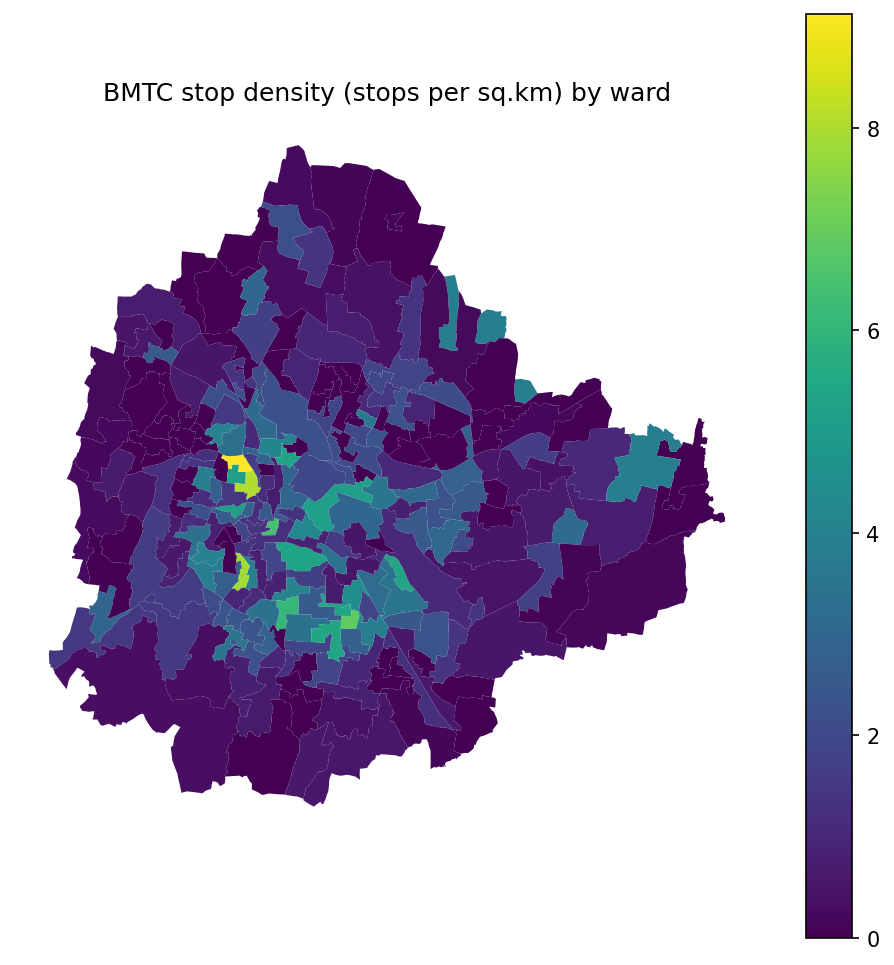


2. Mean Travel Time Map:


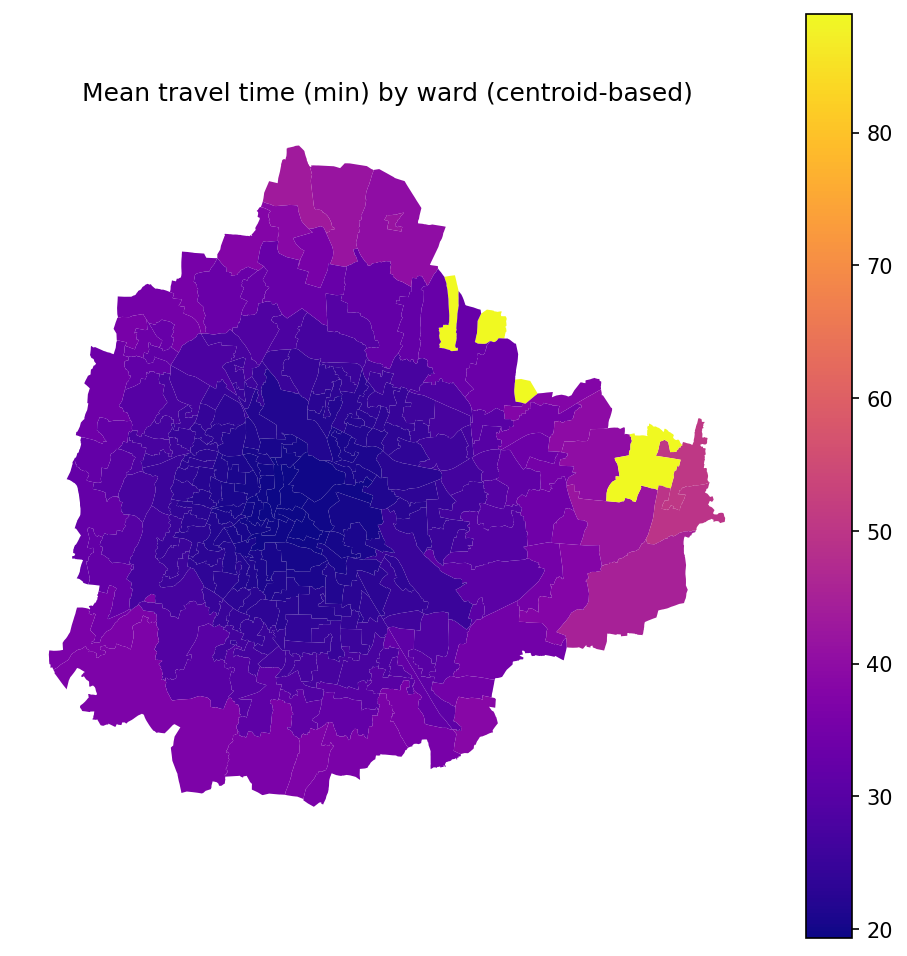


3. Maps reloaded with matplotlib:


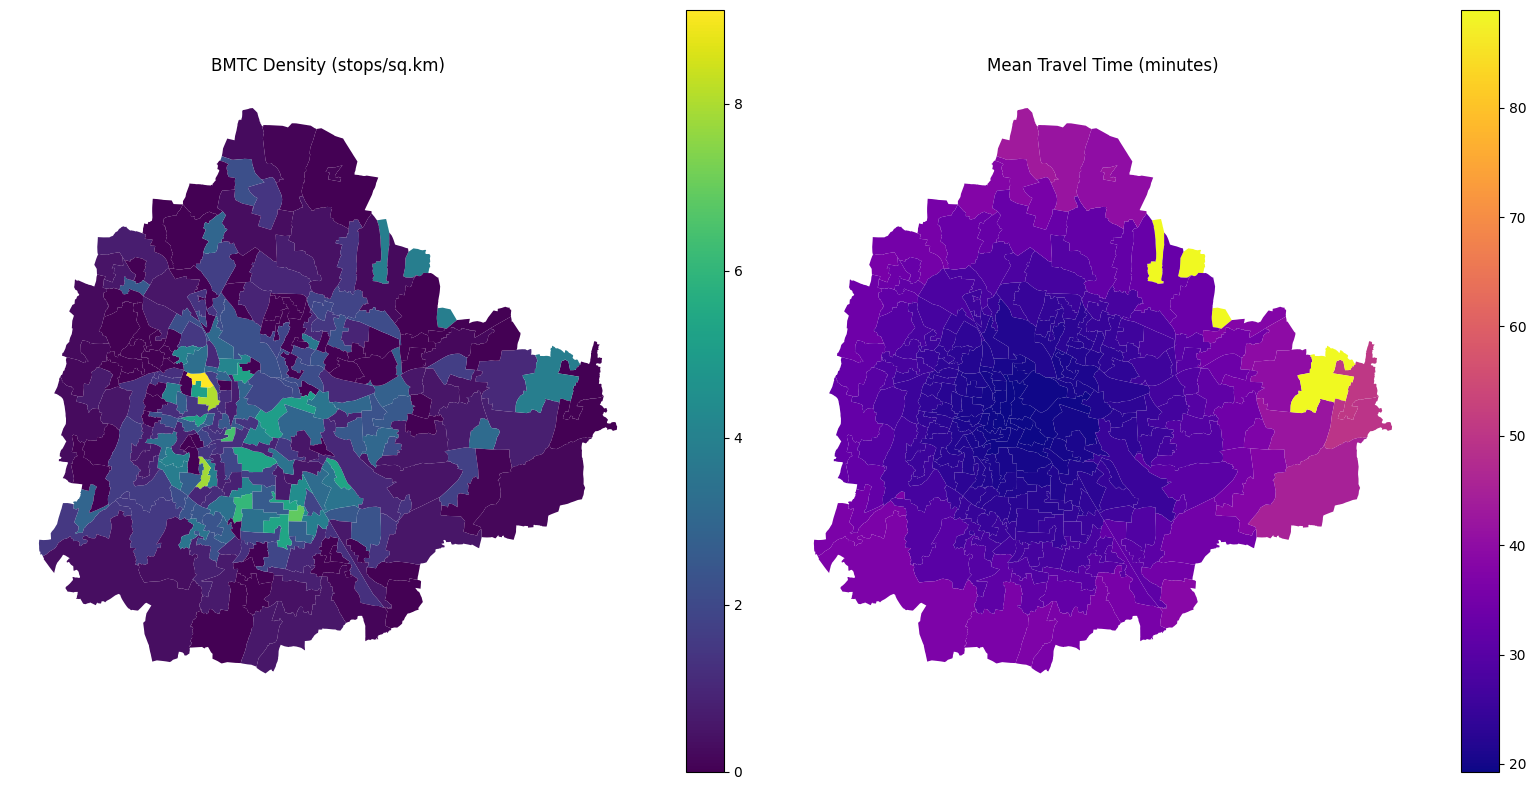


Map Statistics:
----------------------------------------
BMTC Density:
  Min: 0.00 stops/sq.km
  Max: 9.12 stops/sq.km
  Mean: 1.50 stops/sq.km
  Median: 0.97 stops/sq.km

Mean Travel Time:
  Min: 19.31 minutes
  Max: 88.93 minutes
  Mean: 26.96 minutes
  Median: 25.03 minutes


In [ ]:
# 15) View saved maps in Colab
print("Displaying saved maps...")

# Method 1: Using IPython display
from IPython.display import Image, display

print("\n1. BMTC Density Map:")
display(Image(filename=OUTDIR / "map_bmtc_density.png"))

print("\n2. Mean Travel Time Map:")
display(Image(filename=OUTDIR / "map_mean_tau.png"))

# Method 2: Using matplotlib to reload and display
print("\n3. Maps reloaded with matplotlib:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Plot BMTC Density
wards_gdf.plot(column='bmtc_density', ax=ax1, legend=True, cmap='viridis')
ax1.set_title('BMTC Density (stops/sq.km)')
ax1.axis('off')

# Plot Mean Travel Time
wards_gdf.plot(column='mean_tau', ax=ax2, legend=True, cmap='plasma')
ax2.set_title('Mean Travel Time (minutes)')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Method 3: Show some statistics alongside the maps
print("\nMap Statistics:")
print("-" * 40)
print("BMTC Density:")
print(f"  Min: {wards_gdf['bmtc_density'].min():.2f} stops/sq.km")
print(f"  Max: {wards_gdf['bmtc_density'].max():.2f} stops/sq.km")
print(f"  Mean: {wards_gdf['bmtc_density'].mean():.2f} stops/sq.km")
print(f"  Median: {wards_gdf['bmtc_density'].median():.2f} stops/sq.km")

print("\nMean Travel Time:")
print(f"  Min: {wards_gdf['mean_tau'].min():.2f} minutes")
print(f"  Max: {wards_gdf['mean_tau'].max():.2f} minutes")
print(f"  Mean: {wards_gdf['mean_tau'].mean():.2f} minutes")
print(f"  Median: {wards_gdf['mean_tau'].median():.2f} minutes")

In [ ]:
# 14) Create separate zip files
print("Creating separate zip files...")

# Zip 1: Main results (everything except shapefiles)
print("\n1. Zipping main results...")
main_zip = OUTDIR / "bengaluru_commuting_main_results.zip"
with zipfile.ZipFile(main_zip, 'w') as z:
    for f in OUTDIR.iterdir():
        if f.is_file() and not f.name.endswith('.zip'):
            z.write(f, arcname=f.name)
            print(f"  ✓ {f.name}")

# Zip 2: Shapefiles separately (optional)
print("\n2. Zipping shapefiles (optional, can be slow)...")
shapefile_dir = OUTDIR / "shapefile"
if shapefile_dir.exists():
    shapefile_zip = OUTDIR / "bengaluru_commuting_shapefiles.zip"
    # Only zip if directory is not too large
    total_size = sum(f.stat().st_size for f in shapefile_dir.iterdir() if f.is_file())

    if total_size < 50 * 1024 * 1024:  # 50 MB limit
        with zipfile.ZipFile(shapefile_zip, 'w') as z:
            for f in shapefile_dir.iterdir():
                if f.is_file():
                    z.write(f, arcname=f"shapefiles/{f.name}")
        print(f"  ✓ Shapefiles zipped ({total_size/1024:.1f} KB)")
    else:
        print(f"  ⚠ Shapefiles too large ({total_size/1024/1024:.1f} MB), skipping zip")
        print("    Download shapefile directory individually from Colab")

print("\n" + "="*50)
print("ZIP CREATION COMPLETE!")
print("="*50)
print(f"Main results zip: {main_zip}")
if shapefile_dir.exists():
    print(f"Shapefiles zip: {shapefile_zip}")
print(f"\nTotal files in output directory: {len(list(OUTDIR.iterdir()))}")

Creating separate zip files...

1. Zipping main results...
  ✓ od_wards_bmtc.csv
  ✓ gravity_regression_coefficients.csv
  ✓ slide_points.md
  ✓ map_bmtc_density.png
  ✓ elasticity_regression_summary.txt
  ✓ map_mean_tau.png
  ✓ results_summary.json
  ✓ gravity_regression_summary.txt
  ✓ one_pager.md

2. Zipping shapefiles (optional, can be slow)...
  ✓ Shapefiles zipped (1293.6 KB)

ZIP CREATION COMPLETE!
Main results zip: /content/bengaluru_commuting_outputs/bengaluru_commuting_main_results.zip
Shapefiles zip: /content/bengaluru_commuting_outputs/bengaluru_commuting_shapefiles.zip

Total files in output directory: 13


In [ ]:
# 14) Skip zip and provide download methods
print("="*60)
print("OUTPUT COMPLETE - DOWNLOAD OPTIONS")
print("="*60)

print(f"\nAll outputs saved in: {str(OUTDIR)}")
print(f"Total files created: {len(list(OUTDIR.iterdir()))}")

print("\n" + "═"*40)
print("DOWNLOAD METHODS (choose one):")
print("═"*40)

print("\n1. Download entire folder from Colab:")
print("   - Go to Files tab (left sidebar)")
print(f"   - Right-click on '{OUTDIR.name}' folder")
print("   - Select 'Download'")

print("\n2. Download individual files:")
print("   - Navigate to the folder in Files tab")
print("   - Click the 3 dots next to each file")
print("   - Select 'Download'")

print("\n3. Use Python to download (run this in a new cell):")
print(f"""```
import shutil
shutil.make_archive('{OUTDIR}', 'zip', '{OUTDIR}')
from google.colab import files
files.download('{OUTDIR}.zip')
```""")

print("\n4. Mount Google Drive and copy:")
print("```")
print("from google.colab import drive")
print("drive.mount('/content/drive')")
print(f"!cp -r {OUTDIR} /content/drive/MyDrive/")
print("```")

print("\n" + "═"*40)
print("ESSENTIAL FILES (download these at minimum):")
print("═"*40)
essential_files = [
    "results_summary.json",
    "od_wards_bmtc.csv",
    "gravity_regression_summary.txt",
    "elasticity_regression_summary.txt",
    "map_bmtc_density.png",
    "map_mean_tau.png",
    "slide_points.md"
]

for file in essential_files:
    file_path = OUTDIR / file
    if file_path.exists():
        size_kb = file_path.stat().st_size / 1024
        print(f"  • {file} ({size_kb:.1f} KB)")

OUTPUT COMPLETE - DOWNLOAD OPTIONS

All outputs saved in: /content/bengaluru_commuting_outputs
Total files created: 13

════════════════════════════════════════
DOWNLOAD METHODS (choose one):
════════════════════════════════════════

1. Download entire folder from Colab:
   - Go to Files tab (left sidebar)
   - Right-click on 'bengaluru_commuting_outputs' folder
   - Select 'Download'

2. Download individual files:
   - Navigate to the folder in Files tab
   - Click the 3 dots next to each file
   - Select 'Download'

3. Use Python to download (run this in a new cell):
```
import shutil
shutil.make_archive('/content/bengaluru_commuting_outputs', 'zip', '/content/bengaluru_commuting_outputs')
from google.colab import files
files.download('/content/bengaluru_commuting_outputs.zip')
```

4. Mount Google Drive and copy:
```
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/bengaluru_commuting_outputs /content/drive/MyDrive/
```

══════════════════════════════════

In [ ]:
from google.colab import files
import os
from pathlib import Path # Import Path

OUTDIR = Path("/content/bengaluru_commuting_outputs") # Define OUTDIR

# List of essential files to download
essential_files = [
    "results_summary.json",
    "od_wards_bmtc.csv",
    "gravity_regression_summary.txt",
    "elasticity_regression_summary.txt",
    "map_bmtc_density.png",
    "map_mean_tau.png",
    "slide_points.md",
    "one_pager.md",
    "gravity_regression_coefficients.csv"
]

print("Downloading essential files...")
for filename in essential_files:
    file_path = OUTDIR / filename
    if os.path.exists(file_path):
        print(f"• {filename}")
        files.download(str(file_path))
    else:
        print(f"⚠ {filename} not found")

# Also download shapefiles if needed
shapefile_extensions = ['.shp', '.shx', '.dbf', '.prj', '.cpg']
shapefile_dir = OUTDIR / "shapefile"
if os.path.exists(shapefile_dir):
    print("\nDownloading shapefiles...")
    for ext in shapefile_extensions:
        for file in shapefile_dir.glob(f"*{ext}"):
            print(f"• shapefiles/{file.name}")
            files.download(str(file))

NameError: name 'OUTDIR' is not defined